<a href="https://colab.research.google.com/github/mariatomy9/Major-Project/blob/hisana/Hisana__Early_Predictionnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install eeglib
!pip install mne
!pip install pyEDFlib
!pip install EDFlib-Python


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install scikit-learn
!pip install eeglib
import eeglib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from __future__ import print_function
import pandas as pd

from eeglib.helpers import EDFHelper
import mne
from collections import Counter
import statistics
# import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import time
import random
import glob
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sn
import pandas as pd
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU,LSTM
tf.keras.backend.clear_session()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout



SVM

```
# This is formatted as code
```



In [ ]:
epilepsy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Epilepsy_Stages.csv')
epilepsy_data =epilepsy_data.drop(['Unnamed: 0'],axis=1)
# epilepsy_data.columns.

In [ ]:

x=epilepsy_data[['Mean','Std','Ptp','Var','Minim','Maxim','Argminim','Argmaxim','Mean_square','RMS','Abs_diffs_signal','Skewness','Kurtosis']]
y = epilepsy_data.loc[:,'Label'].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8571428571428571


LSTM

In [ ]:
epilepsy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Epilepsy_Stages.csv')
epilepsy_data =epilepsy_data.drop(['Unnamed: 0'],axis=1)
# epilepsy_data.columns.

In [ ]:

x=epilepsy_data[['Mean','Std','Ptp','Var','Minim','Maxim','Argminim','Argmaxim','Mean_square','RMS','Abs_diffs_signal','Skewness','Kurtosis']]
y = epilepsy_data.loc[:,'Label'].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train1 = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test1 = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [ ]:
# x_test.shape

(21, 1, 13)

In [ ]:
# y_train.shape

(84, 3)

In [ ]:
# y_test.shape

(21, 3)

In [ ]:
model = Sequential()
# model.add(LSTM(128, input_shape=(1,13),activation="sigmoid",return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(64, input_shape=(1,13),activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(16,activation="relu"))
model.add(Dropout(0.2))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

history = model.fit(x_train1, y_train, epochs = 100, validation_data= (x_test1, y_test))

Epoch 1/100
3/3 [==============================] - 16s 1s/step - loss: 1.0992 - accuracy: 0.4048 - val_loss: 1.0976 - val_accuracy: 0.5238
Epoch 2/100
3/3 [==============================] - 0s 38ms/step - loss: 1.0928 - accuracy: 0.5952 - val_loss: 1.0944 - val_accuracy: 0.5238
Epoch 3/100
3/3 [==============================] - 0s 83ms/step - loss: 1.0885 - accuracy: 0.6667 - val_loss: 1.0913 - val_accuracy: 0.5238
Epoch 4/100
3/3 [==============================] - 0s 89ms/step - loss: 1.0806 - accuracy: 0.6786 - val_loss: 1.0880 - val_accuracy: 0.5238
Epoch 5/100
3/3 [==============================] - 0s 59ms/step - loss: 1.0772 - accuracy: 0.6548 - val_loss: 1.0844 - val_accuracy: 0.5238
Epoch 6/100
3/3 [==============================] - 0s 137ms/step - loss: 1.0708 - accuracy: 0.6905 - val_loss: 1.0803 - val_accuracy: 0.5238
Epoch 7/100
3/3 [==============================] - 0s 81ms/step - loss: 1.0644 - accuracy: 0.6905 - val_loss: 1.0759 - val_accuracy: 0.5238
Epoch 8/100
3/3 [===

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
pred = model.predict(x_test1)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
print(classification_report(expected_classes, predict_classes, target_names=target_names))

1/1 [==============================] - 1s 515ms/step
(21,)
(21,)
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.45      1.00      0.62         5
           2       0.86      0.86      0.86         7

    accuracy                           0.67        21
   macro avg       0.77      0.73      0.66        21
weighted avg       0.82      0.67      0.65        21



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pred = model.predict(x_test1)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
correct1 = precision_score(expected_classes,predict_classes,average='macro')
correct2 = recall_score(expected_classes,predict_classes,average='macro')
correct3 = f1_score(expected_classes,predict_classes,average='macro')
print(f"Training Accuracy: {correct}")
print(f"Precision: {correct1}")
print(f"Recall: {correct2}")
print(f"F1 Score: {correct3}")

1/1 [==============================] - 0s 23ms/step
(21,)
(21,)
Training Accuracy: 0.6666666666666666
Precision: 0.7705627705627706
Recall: 0.7301587301587301
F1 Score: 0.6607142857142857


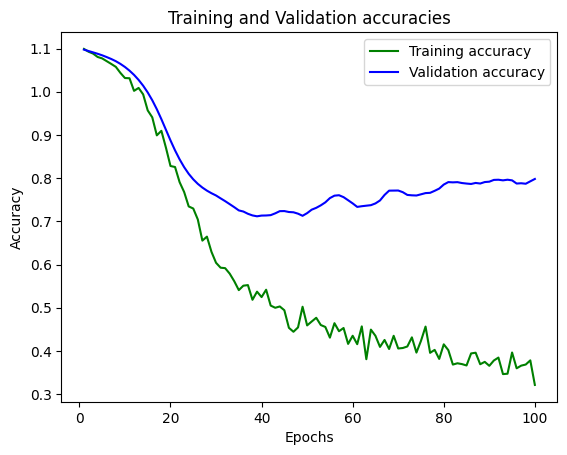

In [ ]:
acc_train = history.history['loss']
acc_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
#plt.show()
plt.savefig("Accuracy_plot_LSTM.png")

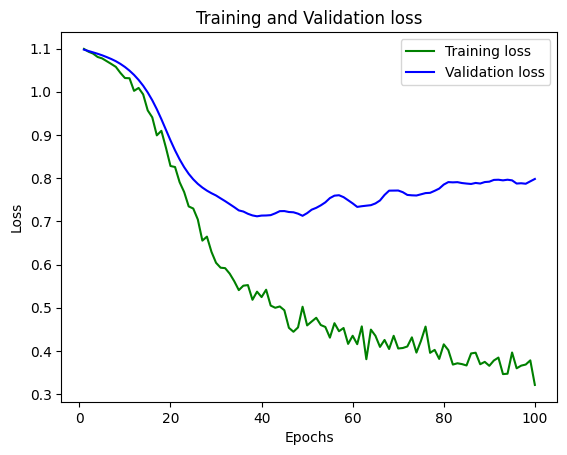

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("Loss_plot_LSTM.png")

# GRU

In [10]:
from __future__ import print_function
import pandas as pd
import eeglib
from eeglib.helpers import EDFHelper
import mne
from collections import Counter
import statistics
# import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import time
import random
import glob
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sn
import pandas as pd
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU,LSTM
tf.keras.backend.clear_session()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout



In [11]:
epilepsy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Epilepsy_Stages.csv')
epilepsy_data =epilepsy_data.drop(['Unnamed: 0'],axis=1)
# epilepsy_data.columns.

In [7]:

x=epilepsy_data[['Mean','Std','Ptp','Var','Minim','Maxim','Argminim','Argmaxim','Mean_square','RMS','Abs_diffs_signal','Skewness','Kurtosis']]
y = epilepsy_data.loc[:,'Label'].values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train1 = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test1 = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [12]:
model = Sequential()
model.add(GRU(128, input_shape=(1,13),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64, input_shape=(1,13),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
history = model.fit(x_train1, y_train, epochs = 100, validation_data= (x_test1, y_test))

Epoch 1/100
3/3 [==============================] - 12s 1s/step - loss: 1.1011 - accuracy: 0.3214 - val_loss: 1.0972 - val_accuracy: 0.1905
Epoch 2/100
3/3 [==============================] - 0s 74ms/step - loss: 1.0944 - accuracy: 0.4048 - val_loss: 1.0919 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 73ms/step - loss: 1.0870 - accuracy: 0.4524 - val_loss: 1.0857 - val_accuracy: 0.5238
Epoch 4/100
3/3 [==============================] - 0s 131ms/step - loss: 1.0804 - accuracy: 0.6071 - val_loss: 1.0783 - val_accuracy: 0.5238
Epoch 5/100
3/3 [==============================] - 0s 77ms/step - loss: 1.0678 - accuracy: 0.6190 - val_loss: 1.0691 - val_accuracy: 0.4762
Epoch 6/100
3/3 [==============================] - 0s 114ms/step - loss: 1.0568 - accuracy: 0.7024 - val_loss: 1.0577 - val_accuracy: 0.5238
Epoch 7/100
3/3 [==============================] - 0s 89ms/step - loss: 1.0479 - accuracy: 0.6548 - val_loss: 1.0430 - val_accuracy: 0.6190
Epoch 8/100
3/3 [==

In [13]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
pred = model.predict(x_test1)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
print(classification_report(expected_classes, predict_classes, target_names=target_names))

1/1 [==============================] - 1s 910ms/step
(21,)
(21,)
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.56      1.00      0.71         5
           2       0.86      0.86      0.86         7

    accuracy                           0.71        21
   macro avg       0.74      0.77      0.71        21
weighted avg       0.76      0.71      0.70        21



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pred = model.predict(x_test1)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
correct1 = precision_score(expected_classes,predict_classes,average='macro')
correct2 = recall_score(expected_classes,predict_classes,average='macro')
correct3 = f1_score(expected_classes,predict_classes,average='macro')
print(f"Training Accuracy: {correct}")
print(f"Precision: {correct1}")
print(f"Recall: {correct2}")
print(f"F1 Score: {correct3}")

1/1 [==============================] - 0s 51ms/step
(21,)
(21,)
Training Accuracy: 0.7142857142857143
Precision: 0.7375661375661376
Recall: 0.7671957671957671
F1 Score: 0.7142857142857143


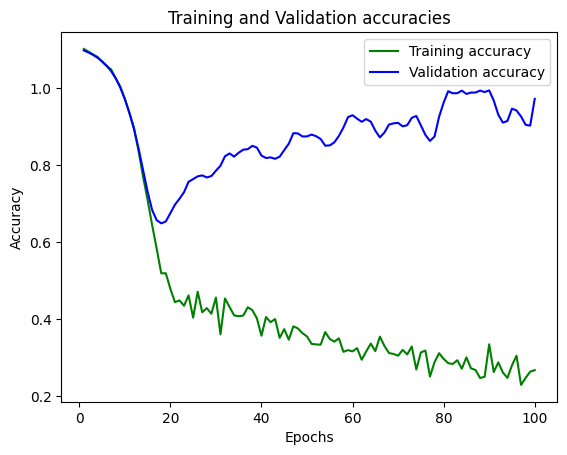

In [15]:
acc_train = history.history['loss']
acc_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
#plt.show()
plt.savefig("Accuracy_plot_GRU.png")

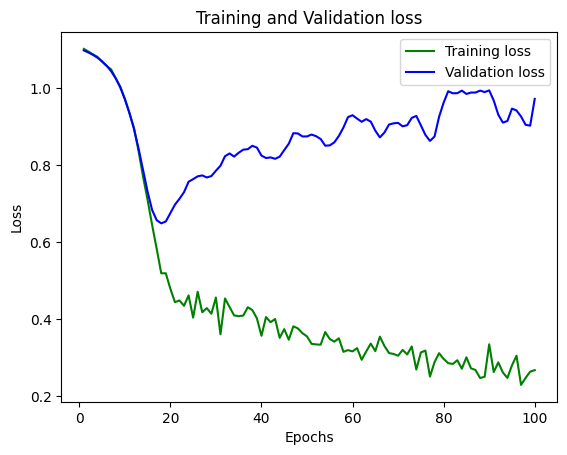

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("Loss_plot_GRU.png")

# DNN

In [ ]:
!pip install tensorflow
from __future__ import print_function
import pandas as pd
import eeglib
from eeglib.helpers import EDFHelper
import mne
from collections import Counter
import statistics
# import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import time
import random
import glob
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sn
import pandas as pd
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU,LSTM
tf.keras.backend.clear_session()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
epilepsy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Epilepsy_Stages.csv')
epilepsy_data =epilepsy_data.drop(['Unnamed: 0'],axis=1)
epilepsy_data

,Mean,Std,Ptp,Var,Minim,Maxim,Argminim,Argmaxim,Mean_square,RMS,Abs_diffs_signal,Skewness,Kurtosis,Label
0,0.269531,37.901517,305,1436.525009,-175,130,117,149,1436.597656,37.902476,3995,-0.093248,2.166872,0
1,-0.413086,35.990291,292,1295.301040,-167,125,1002,962,1295.471680,35.992661,5158,-0.212175,1.758108,0
2,-1.492188,57.817685,592,3342.884705,-345,247,990,1021,1361.111328,36.893242,7557,-0.949835,9.771989,0
3,0.271484,28.710784,216,824.309109,-121,95,31,624,824.382812,28.712067,6160,-0.085351,1.240576,0
4,0.205078,9.726882,52,94.612240,-28,24,669,553,94.654297,9.729044,1934,-0.136404,-0.553882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-2.639648,109.356204,580,11958.779326,-284,296,790,657,7165.747070,84.650736,16411,-0.026950,-0.686586,2
101,-4.240234,193.474580,1080,37432.412991,-537,543,219,284,2826.392578,53.163828,29926,0.072345,-0.542419,2
102,1.761719,126.438812,615,15986.773300,-306,309,214,175,4149.876953,64.419539,14182,-0.137555,-0.530104,2
103,-4.793945,131.600683,776,17318.739768,-317,459,483,95,4861.721680,69.726047,21227,0.235909,0.052615,2


In [ ]:

x=epilepsy_data[['Mean','Std','Ptp','Var','Minim','Maxim','Argminim','Argmaxim','Mean_square','RMS','Abs_diffs_signal','Skewness','Kurtosis']]
y = epilepsy_data.loc[:,'Label'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
x_train.shape

(84, 13)

In [ ]:
def build_model_graph(input_shape=((1,13))):
    model = Sequential()
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    # Compile the model
    
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model



In [ ]:
model = build_model_graph()

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath="dnnpred.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
x_train.shape

(84, 13)

In [ ]:
y_train.shape

(84, 3)

In [ ]:
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.1,callbacks=[checkpointer])

Epoch 1/100


InvalidArgumentError: ignored

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
correct1 = precision_score(expected_classes,predict_classes,average='macro')
correct2 = recall_score(expected_classes,predict_classes,average='macro')
correct3 = f1_score(expected_classes,predict_classes,average='macro')
print(f"Training Accuracy: {correct}")
print(f"Precision: {correct1}")
print(f"Recall: {correct2}")
print(f"F1 Score: {correct3}")

In [ ]:
acc_train = history.history['loss']
acc_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
#plt.show()
plt.savefig("Accuracy_plot_DNN.png")

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.show()
plt.savefig("Loss_plot_DNN.png")

# TESTING

creating CSV file from the mat file code


In [17]:
import scipy.io
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

mat1 = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/EEG Epilepsy Datasets/ictal/ictal14.mat')
value1 = mat1['ictal']
data1 = np.array(value1)
DF = pd.DataFrame(data1)
DF.to_csv("ictal14.csv")

# creating feature set from the above obtained csv

In [18]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)
    
def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
        return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)



In [20]:
import pandas as pd 
  
df = pd.read_csv('/content/ictal14.csv') 
df = df.drop(df.columns[0],axis=1)
# print(df)

b=df.iloc[:,0:].values
c = b.flatten()
df2={'Mean':mean(c),'Std':std(c),'Ptp':ptp(c),'Var':var(c),'Minim':minim(c),'Maxim':maxim(c),'Argminim':argminim(c),'Argmaxim':argmaxim(c),
'Mean_square':mean_square(c),'RMS':rms(c),'Abs_diffs_signal':abs_diffs_signal(c),'Skewness':skewness(c),'Kurtosis':kurtosis(c)}
df.loc[len(df)] = df2

    
df = df.append(df2, ignore_index = True)
df.to_csv('ictalfea14.csv')


<ipython-input-20-1c136affb3cd>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)


Testing the above obtained csv

In [ ]:
dataframe = pd.read_csv("/content/ictalfea14.csv")

dataframe = dataframe.drop([dataframe.columns[0],dataframe.columns[1]],axis=1)
# dataframe =dataframe.drop(['Unnamed: 0'],axis=1)
# dataframe = dataframe.drop(dataframe.columns[1],axis=1)
# dataframe = dataframe.drop([dataframe.columns[-1],dataframe.columns[0]],axis=1)
# dataframe = dataframe.iloc[1025]

dataframe.columns=[['Mean','Std','Ptp','Var','Minim','Maxim','Argminim','Argmaxim','Mean_square','RMS','Abs_diffs_signal','Skewness','Kurtosis']]



# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(dataframe)
# dataframe = scaler.transform(dataframe)

# dataframe1 = np.reshape(dataframe,(dataframe.shape[0],1,dataframe.shape[1]))

# dataframe1
# print(dataframe1[1][0])
# dataframe1.shape
# b = dataframe1[np.logical_not(np.isnan(dataframe1))]
# print(b)
# dataframe1 = dataframe1.iloc[1025]
# dataframe1
# rr = model.predict(dataframe)

In [53]:
dataframe = pd.read_csv("/content/ictalfea14.csv")

dataframe = dataframe.drop([dataframe.columns[0],dataframe.columns[1]],axis=1)
# dataframe =dataframe.drop(['Unnamed: 0'],axis=1)
# dataframe = dataframe.drop(dataframe.columns[1],axis=1)
# dataframe = dataframe.drop([dataframe.columns[-1],dataframe.columns[0]],axis=1)
# dataframe = dataframe.iloc[1025]

dataframe.columns=[['Mean','Std','Ptp','Var','Minim','Maxim','Argminim','Argmaxim','Mean_square','RMS','Abs_diffs_signal','Skewness','Kurtosis']]

dataframe

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(dataframe)
# dataframe = scaler.transform(dataframe)

# dataframe1 = np.reshape(dataframe,(dataframe.shape[0],1,dataframe.shape[1]))

# dataframe1
# print(dataframe1[1][0])
# dataframe1.shape
# b = dataframe1[np.logical_not(np.isnan(dataframe1))]
# print(b)
# dataframe1 = dataframe1.iloc[1025]
# rr = model.predict(dataframe)

,Mean,Std,Ptp,Var,Minim,Maxim,Argminim,Argmaxim,Mean_square,RMS,Abs_diffs_signal,Skewness,Kurtosis
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
predict_classes = np.argmax(rr,axis=1)
# expected_classes = np.argmax(y_test,axis=1)
# print(expected_classes.shape)
print(predict_classes)
# correct = accuracy_score(expected_classes,predict_classes)

[0 0 0 ... 0 0 1]


In [ ]:
d={}
for i in predict_classes:
  if i not in d:
    d[i]=1
  else:
    d[i]+=1
print(d)

{0: 1025, 1: 1}


# WEB APP

In [52]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.2 MB/s eta 0:00:00


In [ ]:
!pip install pandas
!pip install mne
!pip install eeglib
!pip install EDFlib-Python

In [ ]:
%%writefile app1.py

from __future__ import print_function
import pandas as pd
import eeglib
from eeglib.helpers import EDFHelper
import mne
from collections import Counter
import statistics
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import time
import random
import glob
import librosa
import numpy as np
import librosa.display
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import seaborn as sn
import pandas as pd
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from keras.layers.core import Dense, Activation
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras.layers import Dropout


epilepsy_data = pd.read_csv('/content/original_epilepsy_types_new.csv')
epilepsy_data =epilepsy_data.drop(['Unnamed: 0'],axis=1)
x=epilepsy_data[['PFD0', 'PFD1', 'PFD2', 'PFD3', 'PFD4', 'PFD5', 'PFD6', 'PFD7', 'PFD8',
       'PFD9', 'PFD10', 'PFD11', 'PFD12', 'PFD13', 'PFD14', 'PFD15', 'PFD16',
       'PFD17', 'PFD18', 'PFD19', 'PFD20', 'PFD21', 'PFD22', 'DTW',
       'hjorthActivity0', 'hjorthActivity1', 'hjorthActivity2',
       'hjorthActivity3', 'hjorthActivity4', 'hjorthActivity5',
       'hjorthActivity6', 'hjorthActivity7', 'hjorthActivity8',
       'hjorthActivity9', 'hjorthActivity10', 'hjorthActivity11',
       'hjorthActivity12', 'hjorthActivity13', 'hjorthActivity14',
       'hjorthActivity15', 'hjorthActivity16', 'hjorthActivity17',
       'hjorthActivity18', 'hjorthActivity19', 'hjorthActivity20',
       'hjorthActivity21', 'hjorthActivity22']]
y = epilepsy_data['Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier() 
model.fit(x_train, y_train)
#pickle_in = open('/content/classifier (3).pkl', 'rb') 
#classifier = pickle.load(pickle_in)
 
st.cache_data()

# defining the function which will make the prediction using the data which the user inputs 
def prediction(dataframe):   
 
    # Making predictions 

    prediction = model.predict(dataframe)
    
    prediction2 = statistics.mode(prediction)
   
     
    if (prediction2 == 0):
        pred = 'Dis1 Generalised Epilepsy'
    elif (prediction2 == 1):
        pred = 'Dis3 Generalised Epilepsy'
    elif (prediction2 == 2):
        pred = 'Delta Generalised Epilepsy'
    elif (prediction2 == 3):
        pred = 'Single burst Generalised Epilepsy'
    elif (prediction2 == 4):
        pred = 'Temporal Epilepsy'
    elif (prediction2 == 5):
        pred = 'Frontocentral Epilepsy'
    else:
        pred = 'Frontopolar Epilepsy'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Epilepsy Prediction App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    uploaded_file = st.file_uploader("Upload the eeg (EDF)")
    if uploaded_file is not None :
        with open(os.path.join("/content/uploaded_file","patient.edf"),"wb") as f: 
              f.write(uploaded_file.getbuffer())       

        #dataframe = mne.io.read_raw_edf(uploaded_file)
        
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"):
        st.write("Processing Please Wait") 
        s1= mne.io.read_raw_edf('/content/uploaded_file/patient.edf',include=['C3',
        'C4',
        'Cz',
        'F3',
        'F4',
        'F7',
        'F8',
        'Fz',
        'Fp1',
        'Fp2',
        'A1',
        'A2',
        'O1',
        'O2',
        'P3',
        'P4',
        'T5',
        'T6',
        'Pz',
        'T3',
        'T4',
        'ECG-LA',
        'ECG-RA'])
        s2 = mne.export.export_raw('/content/patient1.edf',s1,overwrite=True)
        helper= EDFHelper("/content/patient1.edf",lowpass=70, highpass=1, normalize=True, ICA=True)
        wrapper=eeglib.wrapper.Wrapper(helper)
        wrapper.addFeature.PFD()
        wrapper.addFeature.DTW((0,1))
        wrapper.addFeature.hjorthActivity()
        data=wrapper.getAllFeatures()
        data.to_csv('patient.csv')
        dataframe1 = pd.read_csv('patient.csv')
        dataframe1 = dataframe1.drop(dataframe1.columns[0],axis=1)
        dataframe1.columns = ['PFD0', 'PFD1', 'PFD2', 'PFD3', 'PFD4', 'PFD5', 'PFD6', 'PFD7', 'PFD8',
       'PFD9', 'PFD10', 'PFD11', 'PFD12', 'PFD13', 'PFD14', 'PFD15', 'PFD16',
       'PFD17', 'PFD18', 'PFD19', 'PFD20', 'PFD21', 'PFD22', 'DTW',
       'hjorthActivity0', 'hjorthActivity1', 'hjorthActivity2',
       'hjorthActivity3', 'hjorthActivity4', 'hjorthActivity5',
       'hjorthActivity6', 'hjorthActivity7', 'hjorthActivity8',
       'hjorthActivity9', 'hjorthActivity10', 'hjorthActivity11',
       'hjorthActivity12', 'hjorthActivity13', 'hjorthActivity14',
       'hjorthActivity15', 'hjorthActivity16', 'hjorthActivity17',
       'hjorthActivity18', 'hjorthActivity19', 'hjorthActivity20',
       'hjorthActivity21', 'hjorthActivity22']
        dataframe1.to_csv("patient_app.csv")
        dataframe = pd.read_csv('patient_app.csv')
        dataframe = dataframe.drop(dataframe.columns[0],axis=1)
        result = prediction(dataframe) 
        
        st.success('Patient disease is {}'.format(result))
        print(result)
     

if __name__=='__main__': 
    main()
      

In [ ]:
!streamlit run app1.py & npx localtunnel --port 8501